In [1]:
from jira import JIRA
import pandas as pd
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
options = {'server': 'https://product-jira.ariba.com'}

jira = JIRA(options, basic_auth=('i313684', 'Soumya0484*('))

In [3]:
incidents = jira.search_issues('project=Incidents', maxResults=3000)
#print(incidents)

In [4]:
import csv
csvd = []
print(len(incidents))
for p in incidents:
    csvd.append([p.key,p.raw['fields']['summary']])
    #fd.writelines(p.key + "," + p.raw['fields']['summary'] + "\n")
    #print(csvd)
with open('ims.csv', 'w') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(csvd)    
    
    

1000


In [12]:
data = pd.read_csv('ims.csv')
# data= data.set_index("#")
data.head()

,JIRA,SUMMARY
0,IMS-1469,PROD:Buyer:Nodes of C85 is going to unresponsi...
1,IMS-1468,Documents Queued in legal_disp_queue.
2,IMS-1467,hanac4001a.eu1.ariba.com down
3,IMS-1466,BYREU2(db32.eu1) high CPU usage
4,IMS-1465,US Buyer Community 146 Down


In [14]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = TfidfVectorizer()
tex = data['SUMMARY']
vectorizer.fit(tex )
vectorizer.vocabulary_

{'prod': 1257,
 'buyer': 282,
 'nodes': 1108,
 'of': 1133,
 'c85': 329,
 'is': 935,
 'going': 788,
 'to': 1657,
 'unresponsive': 1700,
 'state': 1560,
 'documents': 601,
 'queued': 1306,
 'in': 887,
 'legal_disp_queue': 978,
 'hanac4001a': 823,
 'eu1': 663,
 'ariba': 192,
 'com': 403,
 'down': 608,
 'byreu2': 292,
 'db32': 519,
 'high': 854,
 'cpu': 463,
 'usage': 1722,
 'us': 1720,
 'community': 415,
 '146': 30,
 'eu': 662,
 'cloud': 387,
 'health': 845,
 'bad': 233,
 'mon': 1067,
 'alert': 143,
 'snv': 1524,
 'an': 155,
 'propogationprocessor': 1277,
 'critical': 471,
 'cms': 389,
 'component': 422,
 'prodeu': 1259,
 'hanacvip4004': 829,
 'byreu22': 293,
 'byreu06': 290,
 'are': 191,
 'having': 841,
 'intermittent': 918,
 'conectivity': 426,
 'issues': 938,
 'acig': 116,
 'robot': 1413,
 'failures': 709,
 'got': 790,
 'three': 1639,
 'row': 1419,
 'dms': 594,
 'front': 757,
 'door': 606,
 'requisitions': 1380,
 'stuck': 1569,
 'approved': 183,
 'status': 1561,
 'archesauxdatapublishi

In [28]:
x = vectorizer.transform(tex).toarray()
x.shape

(1000, 1798)

In [18]:
tfv = TfidfVectorizer(analyzer="word", ngram_range=(1,1))
tfv.fit(tex )
tfv.vocabulary_



{'prod': 1257,
 'buyer': 282,
 'nodes': 1108,
 'of': 1133,
 'c85': 329,
 'is': 935,
 'going': 788,
 'to': 1657,
 'unresponsive': 1700,
 'state': 1560,
 'documents': 601,
 'queued': 1306,
 'in': 887,
 'legal_disp_queue': 978,
 'hanac4001a': 823,
 'eu1': 663,
 'ariba': 192,
 'com': 403,
 'down': 608,
 'byreu2': 292,
 'db32': 519,
 'high': 854,
 'cpu': 463,
 'usage': 1722,
 'us': 1720,
 'community': 415,
 '146': 30,
 'eu': 662,
 'cloud': 387,
 'health': 845,
 'bad': 233,
 'mon': 1067,
 'alert': 143,
 'snv': 1524,
 'an': 155,
 'propogationprocessor': 1277,
 'critical': 471,
 'cms': 389,
 'component': 422,
 'prodeu': 1259,
 'hanacvip4004': 829,
 'byreu22': 293,
 'byreu06': 290,
 'are': 191,
 'having': 841,
 'intermittent': 918,
 'conectivity': 426,
 'issues': 938,
 'acig': 116,
 'robot': 1413,
 'failures': 709,
 'got': 790,
 'three': 1639,
 'row': 1419,
 'dms': 594,
 'front': 757,
 'door': 606,
 'requisitions': 1380,
 'stuck': 1569,
 'approved': 183,
 'status': 1561,
 'archesauxdatapublishi

In [46]:
tfv.

'(?u)\\b\\w\\w+\\b'

In [5]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(n_components=1000).fit_transform(x)

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()
    

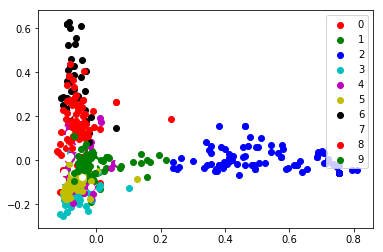

In [38]:
plot_2D(pca,kmeans.labels_,[0,1,2,3,4,5,6,7,8,9])

In [8]:
import csv
data = []
with open('ariba/alerts.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    
    for row in csv_reader:
        #print(row[9], row[16])
        trans = 0
        if(row[16].find("Transient") != -1):
            trans =1
        data.append([row[3],row[4],row[5],row[7],row[9], trans])
        line_count += 1
        if(line_count > 50000):
            break
np_data = np.array(data)
np_data.shape


(50001, 6)

In [80]:
np_data[1:5,4]

array([' UI-1420663@app514 Failed Search Count: Error',
       ' UI-1420351@app514 Ninety Percentile Type Ahead Search Time: 0.00 ms ',
       ' UI-1420351@app514 Average Type Ahead Search Time: 0.00 ms ',
       ' UI-12720695@app464 Failed Type Ahead Search Count: Error'],
      dtype='<U169')

In [9]:
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer()
vectorizer.fit(np_data[:,4])
vectorizer.vocabulary_



{'mpi_page_text': 12504,
 'ui': 14087,
 '1420663': 2179,
 'app514': 9052,
 'failed': 11471,
 'search': 13412,
 'count': 10974,
 'error': 11394,
 '1420351': 2175,
 'ninety': 12572,
 'percentile': 12849,
 'type': 14078,
 'ahead': 8507,
 'time': 14033,
 '00': 0,
 'ms': 12507,
 'average': 9379,
 '12720695': 1636,
 'app464': 8984,
 '23520453': 4047,
 'app510': 9048,
 '22520348': 3930,
 'app508': 9046,
 '18120722': 3168,
 'app420': 8919,
 '25220495': 4254,
 'app490': 9021,
 '19820768': 3500,
 'app391': 8911,
 '12220552': 1379,
 'app495': 9031,
 '4820757': 6502,
 'app492': 9025,
 '21620160': 3768,
 'app443': 8948,
 '320313': 4938,
 'app440': 8942,
 '14820493': 2414,
 'app488': 9017,
 '420158': 6113,
 'app441': 8944,
 '4720496': 6425,
 'app491': 9023,
 '14820337': 2411,
 '11620693': 1013,
 'app462': 8980,
 '21620316': 3769,
 '1520560': 2528,
 'app515': 9054,
 'monitor': 12475,
 'alert': 8510,
 'triggered': 14066,
 'metadata': 12416,
 '0016': 20,
 'sc1': 13377,
 'prod': 12977,
 'basex': 9410,
 

In [10]:
tot = np_data[:,4]
x = vectorizer.transform(tot).toarray()
pca = PCA(n_components=4).fit_transform(x)

In [12]:
y = np_data[:,5]


In [13]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.10)
print(x.shape, x_train.shape, x_test.shape)


(50001, 14326) (45000, 14326) (5001, 14326)


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import svm

In [ ]:
clf = svm.SVC(C = 10, gamma=.001)
# clf = PassiveAggressiveClassifier(max_iter=1000000, random_state=0,tol=1e-3)
clf.fit(x_train,y_train)

In [113]:
from sklearn import metrics
y_pred = clf.predict(x_test)
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83     14816
           1       0.48      0.35      0.41      5185

   micro avg       0.73      0.73      0.73     20001
   macro avg       0.64      0.61      0.62     20001
weighted avg       0.71      0.73      0.72     20001

